## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
#print(mouse_metadata)
study_results = pd.read_csv(study_results)
#print(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID", "Mouse ID"])
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = data_df["Tumor Volume (mm3)"].mean()
tv_median = data_df["Tumor Volume (mm3)"].median()
tv_var = data_df["Tumor Volume (mm3)"].var()
tv_std = data_df["Tumor Volume (mm3)"].std()
tv_sem  = st.sem(data_df["Tumor Volume (mm3)"])
index = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]

statistics_df = pd.DataFrame({"Tumor Volume (mm3)":[tv_mean, tv_median, tv_var, tv_std, tv_sem]}, index)
statistics_df.head()

,Tumor Volume (mm3)
Mean,50.448381
Median,48.951474
Variance,79.116074
Standard Deviation,8.894722
SEM,0.204436


## Bar plots

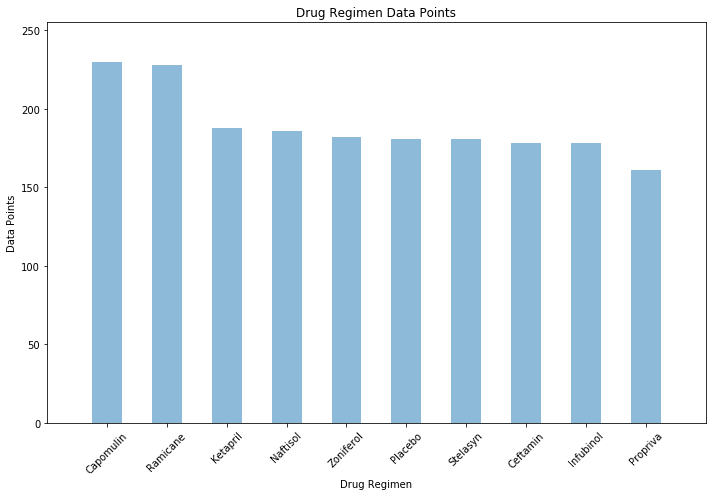

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatments = data_df["Drug Regimen"].value_counts()
treat_df = treatments.to_frame(name = "Data Points")
treat_df.index.name = "Drug Regimen"
#treat_df.head()

treat_df.plot(kind = "bar", alpha = 0.5, legend = None, figsize = (10, 7))
plt.title("Drug Regimen Data Points")
plt.ylabel("Data Points")
plt.xticks(rotation = 45)
plt.xlim(-1, len(treat_df.index))
plt.ylim(0, max(treat_df["Data Points"]) + 25)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


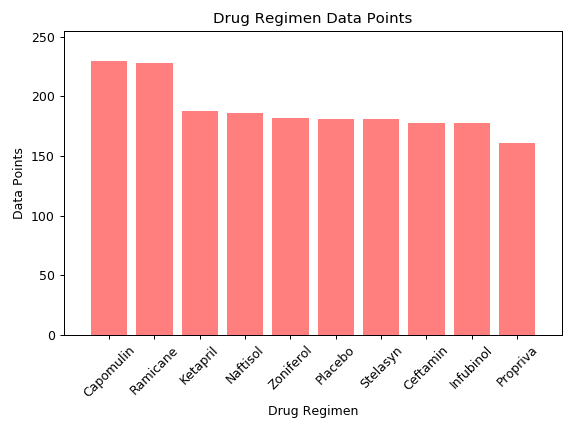

In [51]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_ax = list(treat_df.index)
fig1, ax1 = plt.subplots()
plt.bar(x_ax, treat_df["Data Points"], align = "center", color = "red", alpha = 0.5)
plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = 45)
plt.xlim(-1, len(x_ax))
plt.ylim(0, max(treat_df["Data Points"]) + 25)
plt.tight_layout()
plt.show()

## Pie plots

<IPython.core.display.Javascript object>


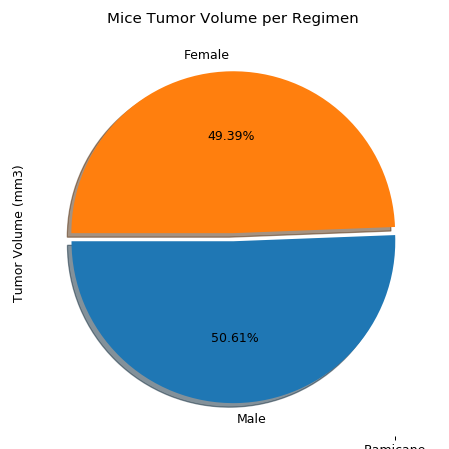

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = data_df["Sex"].value_counts()
gender_df = genders.to_frame(name = "Count")
gender_df.index.name = "Gender"
#gender_df.head()

fig2, ax2 = plt.subplots()
gender_df["Count"].plot(kind = "pie", figsize = (5,5), explode = (0.05, 0), shadow=True, startangle=180, autopct="%1.2f%%")
plt.title("Mice Gender Distribution")
plt.tight_layout()
plt.ylabel(" ")
plt.show()

<IPython.core.display.Javascript object>


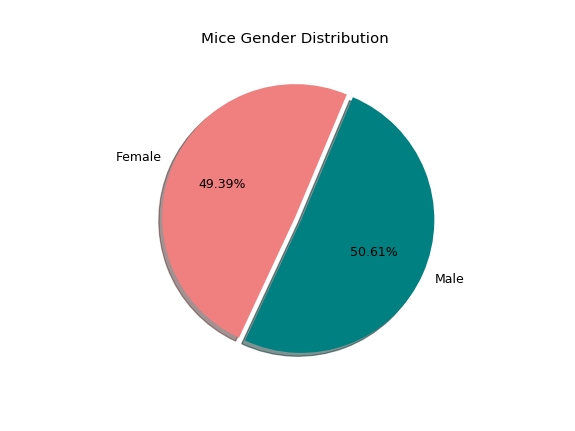

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = list(gender_df.index)
#print(gender)
fig3, ax3 = plt.subplots()
explode = (0.05, 0)
plt.pie(gender_df["Count"], explode, gender, colors = ("teal", "lightcoral"), autopct="%1.2f%%", shadow = True, startangle = -115)
plt.title("Mice Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
last_point_df = data_df.groupby(["Mouse ID"]).max().reset_index()[["Mouse ID","Timepoint"]]
last_tumor_df = last_point_df.merge(data_df, on=["Mouse ID","Timepoint"], how = "left")
#last_tumor_df = last_tumor_df.sort_values(by = "Tumor Volume (mm3)", ascending = True)
#last_tumor_df.head()

best_treat_df = last_tumor_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].min().reset_index()
#best_treat_df = best_treat_df.sort_values(by = "Tumor Volume (mm3)", ascending = True)
#best_treat_df.head()

bt = last_tumor_df["Drug Regimen"].isin(["Ramicane", "Capomulin", "Infubinol", "Ceftamin"])
bt_df = last_tumor_df[bt]
#bt_df.head()

tv_quartiles = bt_df["Tumor Volume (mm3)"].quantile([0.25, 0.75])
tv_lowq = tv_quartiles[0.25]
tv_upq = tv_quartiles[0.75]
#print(tv_lowq)
#print(tv_upq)

iqr = tv_upq - tv_lowq
#print(iqr)

l_bound = tv_lowq - (1.5*iqr)
u_bound = tv_upq + (1.5*iqr)

print(f'The values below {l_bound} could be outliers')
print(f'The values above {u_bound} could be outliers')

The values below 3.0739668737499812 could be outliers
The values above 94.04403868375002 could be outliers


<IPython.core.display.Javascript object>


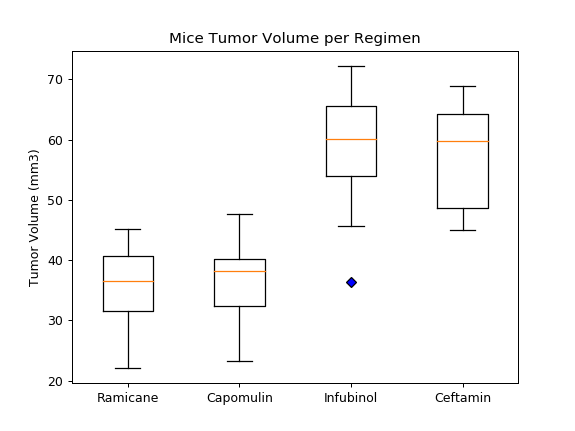

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = bt_df["Tumor Volume (mm3)"].astype(int)
#print(tumor_vol)

rami_df = last_tumor_df[last_tumor_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

# important_df[important_df["IMDB"] > 7 ]["FILM"]

capo_df = last_tumor_df[last_tumor_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
infu_df = last_tumor_df[last_tumor_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
cefta_df = last_tumor_df[last_tumor_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

fig4, ax4 = plt.subplots()
ax4.set_title("Mice Tumor Volume per Regimen")
ax4.set_ylabel("Tumor Volume (mm3)")
blue_diamond = dict(markerfacecolor='b', marker='D')
labels = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]
ax4.boxplot([rami_df, capo_df, infu_df, cefta_df], flierprops=blue_diamond, labels = labels)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


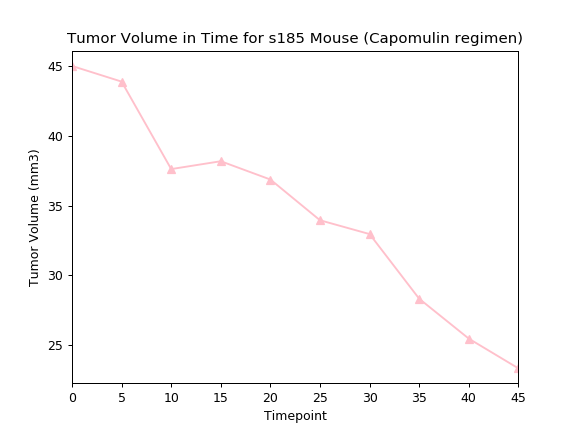

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_mouse_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin"]
capo_mouseid_df = capo_mouse_df.loc[data_df["Mouse ID"] == "s185"]
#capo_mouseid_df.head()

capo_mouseid_df.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", legend = False, color = "pink", marker = "^")
plt.title("Tumor Volume in Time for s185 Mouse (Capomulin regimen)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


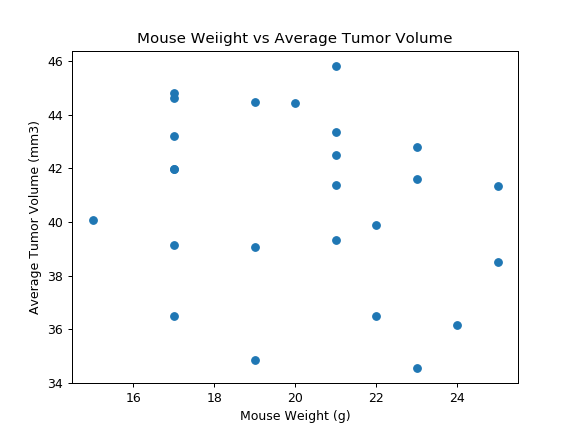

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor = capo_mouse_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#print(len(tumor))
useful = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Capomulin"]
weight = useful["Weight (g)"]
#print(len(weight))

fig5, ax5 = plt.subplots()
plt.scatter(weight, tumor)
plt.title("Mouse Weiight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between each mouse weight and average tumor volume is -0.23


<IPython.core.display.Javascript object>


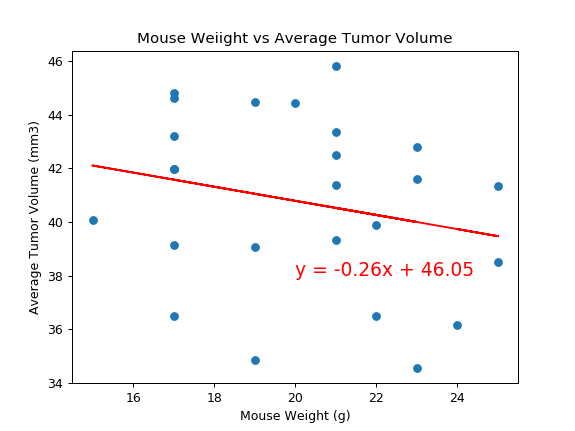

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor)
print(f'The correlation between each mouse weight and average tumor volume is {round(correlation[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight*slope+intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)) 

fig6, ax6 = plt.subplots()
plt.scatter(weight, tumor)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (20, 38), fontsize = 15, color = "red")
plt.title("Mouse Weiight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Insight Values

* The Ramicane and Capomulin are the drug regimens with the most Datapoints.

* Most mice treated with Capomulin and Ramicane had a notorious decrease in the Average Tumor Volume.

* The mice gender was almost equally distributed between male and female.

* The mean final Average Tumor Volume for the Ramicane treated mice was the smallest between the four most promising treatments.

* The Ramicane IQR is larger than the Capomulin IQR
